In [28]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm

In [2]:
%matplotlib inline

In [3]:
PATH = Path("/home/ubuntu/data/kaggle/old/all_data/input/")

In [4]:
[print(i) for i in PATH.iterdir()]

/home/ubuntu/data/kaggle/old/all_data/input/test
/home/ubuntu/data/kaggle/old/all_data/input/sample_result.csv
/home/ubuntu/data/kaggle/old/all_data/input/train
/home/ubuntu/data/kaggle/old/all_data/input/train-rle.csv


[None, None, None, None]

In [31]:
masks_path = [i for i in Path(PATH/"train/mask-flip").iterdir()]

In [18]:
img_arr = np.array(Image.open(masks_path[0]), dtype=bool)
img = Image.fromarray(np.uint8(img_arr))

In [19]:
img.save("check.png")

In [21]:
im = np.array(Image.open("check.png"))

In [22]:
np.unique(im, return_counts=True)

(array([0, 1], dtype=uint8), array([1040296,    8280]))

In [11]:
 np.max(img)

255

## Flip masks right way

In [62]:
def flip_mask(path):
    img = Image.open(path)
    img = img.transpose(Image.ROTATE_90)
    img = img.transpose(Image.FLIP_TOP_BOTTOM)
    img.save(PATH/f'train/mask-flip/{path.name}')

In [63]:
for im in tqdm(masks_path):
    flip_mask(im)

## Correct labels

In [24]:
def convert_label(path):
    img_arr = np.array(Image.open(path), dtype=bool)
    img = Image.fromarray(np.uint8(img_arr))
    img.save(PATH/f'train/mask-flip-fix/{path.name}')

In [32]:
for im in tqdm(masks_path):
    convert_label(im)

100%|██████████| 10712/10712 [02:22<00:00, 75.64it/s]


In [18]:
len(masks_path)

10712

In [28]:
df = pd.read_csv(PATH/"train-rle.csv")

In [29]:
df.head()

,ImageId,EncodedPixels
0,1.2.276.0.7230010.3.1.4.8323329.5597.151787518...,-1
1,1.2.276.0.7230010.3.1.4.8323329.12515.15178752...,-1
2,1.2.276.0.7230010.3.1.4.8323329.4904.151787518...,175349 7 1013 12 1009 17 1005 19 1003 20 1002...
3,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,407576 2 1021 7 1015 10 1013 12 1011 14 1008 ...
4,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,252069 1 1021 3 1020 4 1018 5 1018 6 1016 7 1...


In [41]:
len(df)

11582

In [38]:
neg1 = df.iloc[0][" EncodedPixels"]

In [39]:
images = df[df[" EncodedPixels"] != neg1].ImageId.values

In [40]:
len(images)

3286

In [10]:
def show_image(img_name, folder):
    img = Image.open(PATH/f'train_png/{img_name}.png')
#     img = Image.open(PATH/f'train/{folder}/{img_name}.png')
#     if folder == "mask":
#         img = img.transpose(Image.ROTATE_90)
#         img = img.transpose(Image.FLIP_TOP_BOTTOM)
    plt.imshow(img)

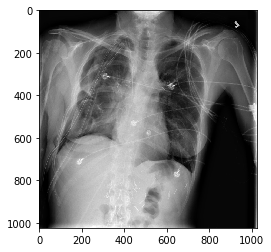

In [11]:
show_image(sample[31], "mask")

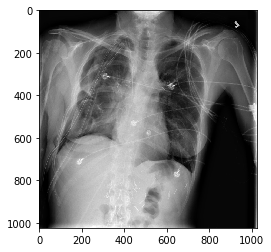

In [80]:
show_image(sample[31], "dicom")

In [47]:
from tqdm import tqdm_notebook as tqdm

In [48]:
names = list(df.ImageId)

In [54]:
biggest = 0
idx = 0

In [56]:
for i, img_path in enumerate(tqdm(masks_path)):
#     img_arr = np.array(Image.open(PATH/f'train/mask/{img_path}.png'))
    img_arr = np.array(Image.open(img_path))
    
    size = np.sum(img_arr)
    if size > biggest:
        biggest = size
        idx = i

In [64]:
idx

9703

In [53]:
names[idx]

'1.2.276.0.7230010.3.1.4.8323329.5498.1517875188.505805'

In [52]:
show_image(names[idx], "mask")

NameError: name 'show_image' is not defined

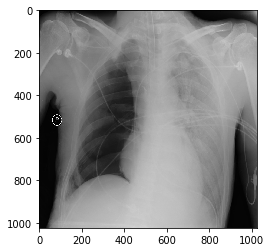

In [62]:
show_image(names[idx], "dicom")